In [1]:
import jiwer
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from utils import load_custom_dataset

In [2]:
base_directory = Path.cwd().parent

dataset_name = "yale_econ251"
data_dir = base_directory / 'data'

dataset_size = "normal" # or 'tiny'

if dataset_size == "tiny":
    audio_dir = data_dir / 'inputs' / dataset_name / 'lectures-tiny'
    transcripts_dir = data_dir / 'inputs' / dataset_name / 'transcripts-tiny'
else:
    audio_dir = data_dir / 'inputs' / dataset_name / 'lectures'
    transcripts_dir = data_dir / 'inputs' / dataset_name / 'transcripts'


In [3]:

model_dir = "wav2vec2-base-960h" # baseline
# model_name = "facebook/wav2vec2-base"

In [4]:
predictions_dir = data_dir / 'predictions' / dataset_name / model_dir

In [5]:
import os
os.listdir(predictions_dir)

['pred_14_normal_with_lm.txt',
 'pred_20_normal_with_lm.txt',
 'pred_01_normal_with_lm.txt',
 'pred_06_normal_with_lm.txt',
 'pred_11_normal_with_lm.txt',
 'pred_09_normal_with_lm.txt',
 'pred_22_normal_with_lm.txt',
 'pred_24_normal_with_lm.txt',
 'pred_04_normal_with_lm.txt',
 'pred_25_normal_with_lm.txt',
 'pred_08_normal_with_lm.txt',
 'pred_02_normal_with_lm.txt',
 'pred_07_normal_with_lm.txt',
 'pred_05_normal_with_lm.txt',
 'pred_18_normal_with_lm.txt',
 'pred_13_normal_with_lm.txt',
 'pred_10_normal_with_lm.txt',
 'pred_23_normal_with_lm.txt',
 'pred_15_normal_with_lm.txt',
 'pred_17_normal_with_lm.txt',
 'pred_19_normal_with_lm.txt',
 'pred_16_normal_with_lm.txt',
 'pred_26_normal_with_lm.txt',
 'pred_03_normal_with_lm.txt',
 'pred_21_normal_with_lm.txt',
 'pred_12_normal_with_lm.txt']

In [6]:
transformation = jiwer.Compose([
    jiwer.ToUpperCase(),
    jiwer.RemoveWhiteSpace(replace_by_space=True),
    jiwer.RemoveMultipleSpaces(),
    jiwer.RemovePunctuation(),
    jiwer.ReduceToListOfListOfWords(word_delimiter=" ")
])

In [10]:
errors = []

# selected_files = ['06']#['01', '02', '03', '04', '05' ]

for transcript in transcripts_dir.glob('*.txt'):
    # print(transcript)
    file_no = transcript.stem
    # if file_no not in selected_files:
    #     continue

    # load the ground truth text
    with open(transcript, 'r') as f:
        ground_truth = f.read()

    # load the predicted text
    pred_file_name = 'pred_' + file_no + '_' + dataset_size + '_with_lm'
    pred_file_path = (predictions_dir / pred_file_name).with_suffix('.txt')

    with open(pred_file_path, 'r') as f:
        hypothesis = f.read()

    measures = jiwer.compute_measures(ground_truth,
                                      hypothesis,
                                      truth_transform=transformation,
                                      hypothesis_transform=transformation)
    wer = measures['wer']
    mer = measures['mer']
    wil = measures['wil']
    #
    errors.append([wer, mer, wil])


In [8]:
errors

[[0.3421479713603819, 0.30283058724123363, 0.4369584475770477]]

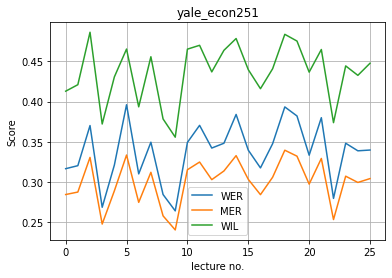

Average WER: 0.33819272880345524
Average MER: 0.30002604798414756
Average WIL: 0.43621802570126483


In [11]:
xrange = [i for i in range(len(errors))]

plt.plot(xrange, np.array(errors)[:,0], label="WER")
plt.plot(xrange, np.array(errors)[:,1], label="MER")
plt.plot(xrange, np.array(errors)[:,2], label="WIL")
plt.title(f"{dataset_name}")
plt.xlabel("lecture no.")
plt.ylabel("Score")
plt.legend()
plt.grid()
plt.show()

print(f"Average WER: {np.average(np.array(errors)[:,0])}")
print(f"Average MER: {np.average(np.array(errors)[:,1])}")
print(f"Average WIL: {np.average(np.array(errors)[:,2])}")